In [108]:
# pip install lux-api

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc
plt.style.use('ggplot')

In [110]:
df = pd.read_csv('feature_base.csv')
df_train = df[~df['label'].isnull()]

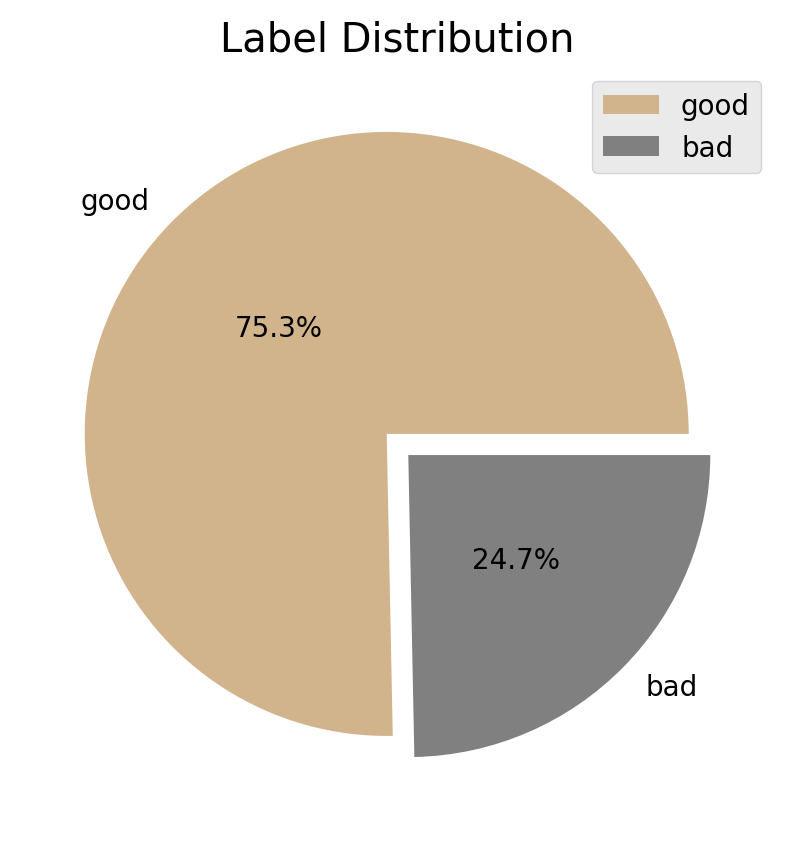

In [112]:
data1 = df_train.groupby("label")["user"].count()

colors = ['tan', 'grey']
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200

pie, ax = plt.subplots(figsize=[5,5])
labels = ['good', 'bad']
plt.pie(x=data1, autopct="%.1f%%", explode=[0.05]*2, labels=labels, colors=colors, pctdistance=0.5)
plt.title("Label Distribution")
plt.legend(["good", "bad"])
pie.savefig("label.png")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

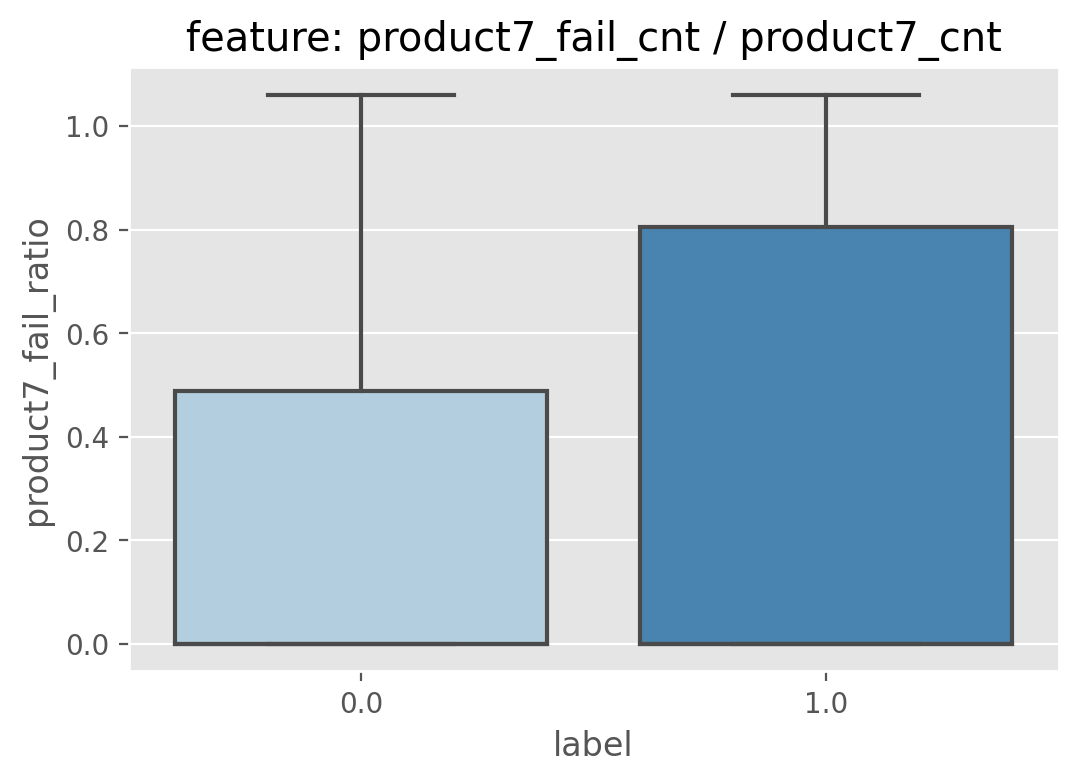

In [122]:
ax = sns.boxplot( x=df_train['label'], y=df_train['product7_fail_ratio'], palette="Blues")
plt.title("feature: product7_fail_cnt / product7_cnt")
plt.savefig("product7fr.png")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

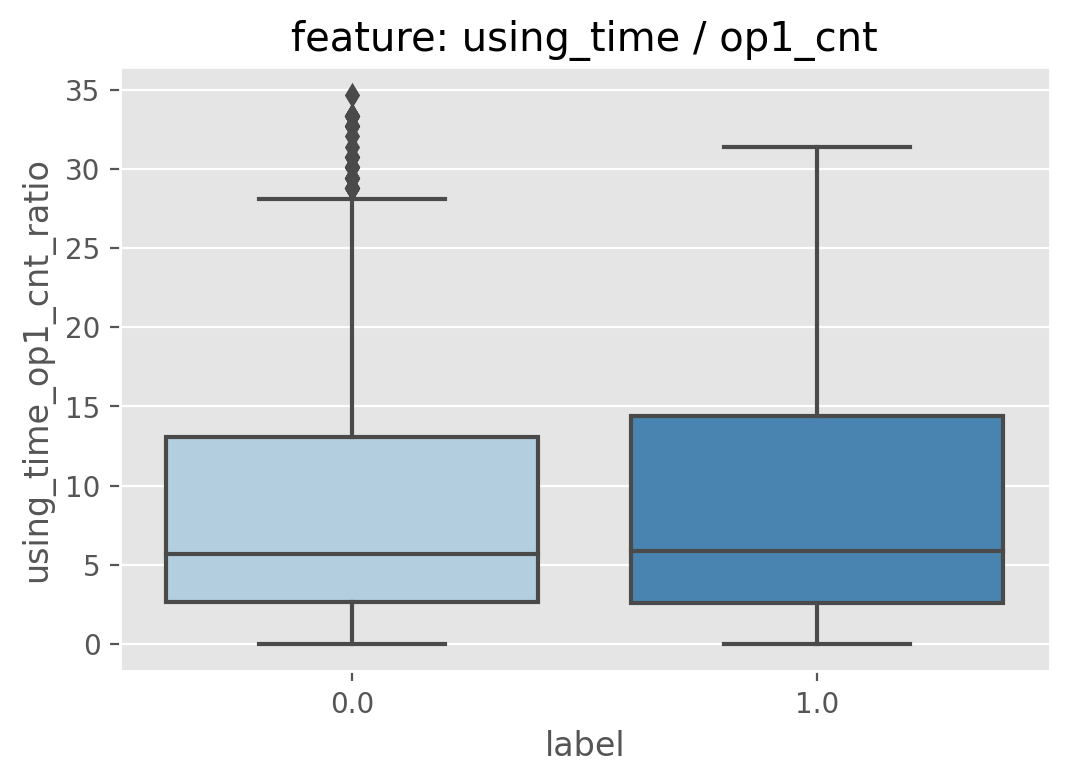

In [116]:
ax = sns.boxplot( x=df_train['label'], y=df_train['using_time_op1_cnt_ratio'], palette="Blues")
plt.title("feature: using_time / op1_cnt")
plt.savefig("timeop1.png")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

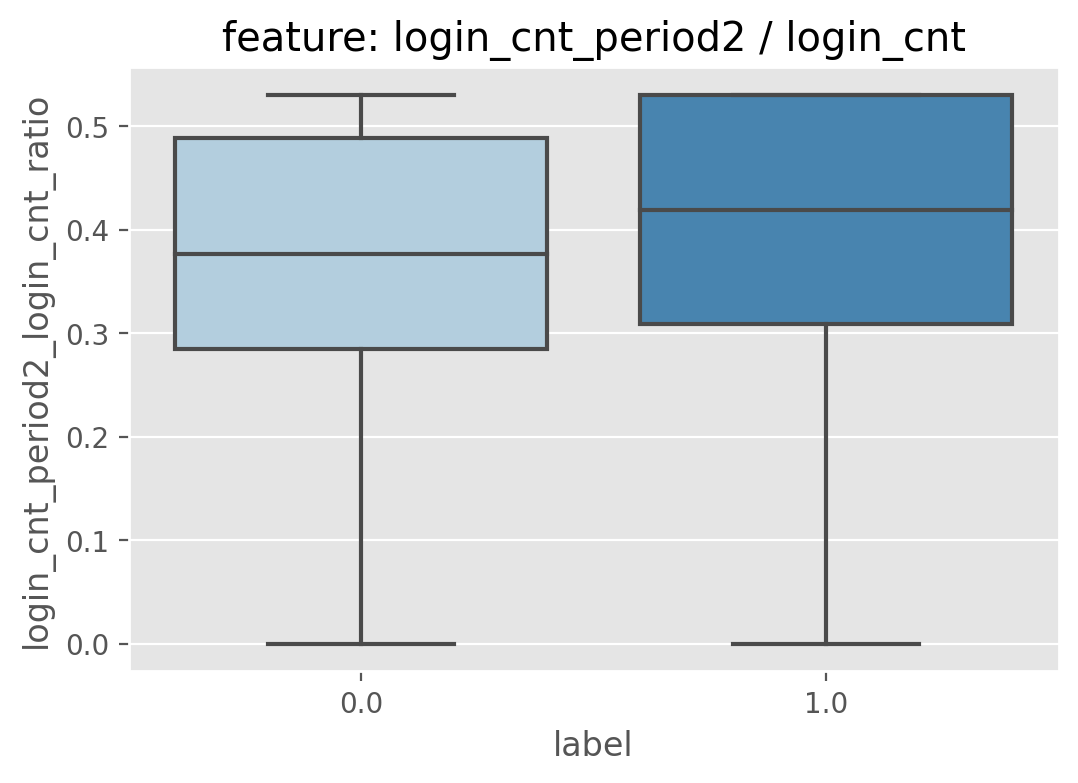

In [119]:
ax = sns.boxplot( x=df_train['label'], y=df_train['login_cnt_period2_login_cnt_ratio'], palette="Blues")
plt.title("feature: login_cnt_period2 / login_cnt")
plt.savefig("loginp2.png")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

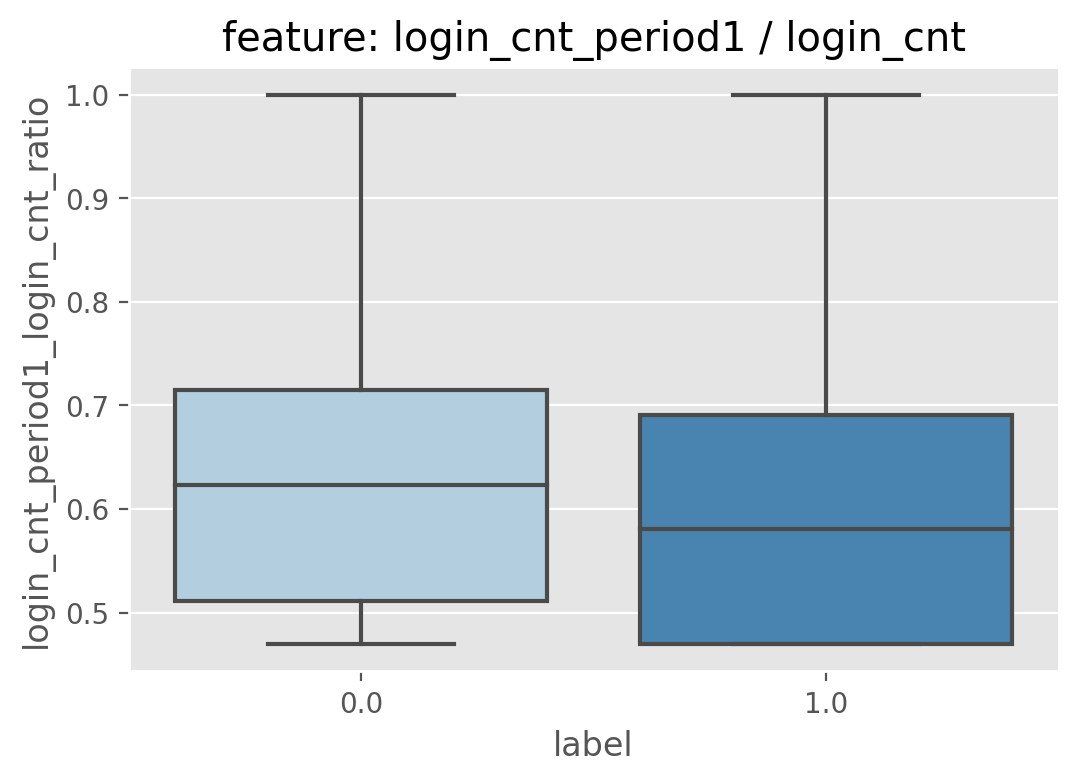

In [120]:
ax = sns.boxplot( x=df_train['label'], y=df_train['login_cnt_period1_login_cnt_ratio'], palette="Blues")
plt.title("feature: login_cnt_period1 / login_cnt")
plt.savefig("loginp1.png")

In [129]:
trans = pd.read_csv('train_trans_new.csv', index_col=0)
label = pd.read_csv('train_label_new.csv', index_col=0)

E:\Anaconda\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,user,label
0,Train_40613,1
1,Train_34829,0
2,Train_16849,0
3,Train_41919,0
4,Train_11748,0


In [134]:
trans_df = pd.merge(trans, label, on='user')
trans_df.head()

E:\Anaconda\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,user,platform,tunnel_in,tunnel_out,amount,type1,ip,type2,ip_3,tm_diff,label
0,Train_13770,46c69cbbce5f1568,b2e7fa260df4998d,6ee790756007e69a,185784,45a1168437c708ff,NaN,11a213398ee0c623,NaN,19 days 09:02:45.000000000,0
1,Train_13770,46c69cbbce5f1568,b2e7fa260df4998d,6ee790756007e69a,391769,45a1168437c708ff,NaN,11a213398ee0c623,NaN,19 days 09:03:58.000000000,0
2,Train_08351,46c69cbbce5f1568,b2e7fa260df4998d,6ee790756007e69a,27740,674e8d5860bc033d,f10a09fe9e522a47,11a213398ee0c623,ee386d6f9fe45d0d,18 days 11:06:49.000000000,0
3,Train_08351,42573d7287a8c9c2,NaN,6ee790756007e69a,36689,f67d4b5a05a1352a,NaN,NaN,NaN,26 days 09:52:51.000000000,0
4,Train_08351,42573d7287a8c9c2,NaN,6ee790756007e69a,30746,f67d4b5a05a1352a,NaN,NaN,NaN,26 days 07:50:05.000000000,0


In [137]:
#transform variable tm_diff
def transform_time(x):
    day = int(x.split(' ')[0])
    hour = int(x.split(' ')[2].split('.')[0].split(':')[0])
    minute = int(x.split(' ')[2].split('.')[0].split(':')[1])
    second = int(x.split(' ')[2].split('.')[0].split(':')[2])
    return 86400*day+3600*hour+60*minute+second

trans_df['day'] = trans_df['tm_diff'].apply(lambda x: int(x.split(' ')[0]))
trans_df['timestamp'] = trans_df['tm_diff'].apply(lambda x: transform_time(x))
trans_df['hour'] = trans_df['tm_diff'].apply(lambda x: int(x.split(' ')[2].split('.')[0].split(':')[0]))
trans_df['week'] = trans_df['day'].apply(lambda x: x % 7)

# using timestamp to reorganize the sequence of each user's behaviour
trans_df = trans_df.sort_values(by=['user', 'timestamp'])
trans_df.reset_index(inplace=True, drop=True)

gc.collect()

82915

In [138]:
df_good = trans_df[trans_df['label'] == 0]
df_bad = trans_df[trans_df['label'] == 1]

df_good.shape, df_bad.shape

((425547, 15), (45042, 15))

In [140]:
df_good.head()

E:\Anaconda\lib\site-packages\lux\executor\PandasExecutor.py:401: UserWarning:
Lux detects that the attribute 'day' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Pandas Datetime objects using the pd.to_datetime function and provide a 'format' parameter to specify the datetime format of the attribute.
For example, you can convert a year-only attribute (e.g., 1998, 1971, 1982) to Datetime type by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['day'] = pd.to_datetime(df['day'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If day is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'day':'quantitative'})
E:\Anaconda\lib\site-packages\lux\executor\PandasExecutor.py:401: UserWarning:
Lux detects that the attribute 

,user,platform,tunnel_in,tunnel_out,amount,type1,ip,type2,ip_3,tm_diff,label,day,timestamp,hour,week
0,Train_00000,46c69cbbce5f1568,b2e7fa260df4998d,6ee790756007e69a,30746,674e8d5860bc033d,9a521575f39ab986,11a213398ee0c623,18f32d48945accab,13 days 12:56:13.000000000,0,13,1169773,12,6
1,Train_00000,42573d7287a8c9c2,NaN,6ee790756007e69a,24798,f67d4b5a05a1352a,NaN,NaN,NaN,13 days 12:56:19.000000000,0,13,1169779,12,6
2,Train_00000,46c69cbbce5f1568,b2e7fa260df4998d,6ee790756007e69a,27740,674e8d5860bc033d,9a521575f39ab986,11a213398ee0c623,18f32d48945accab,13 days 12:56:59.000000000,0,13,1169819,12,6
3,Train_00000,42573d7287a8c9c2,NaN,6ee790756007e69a,30746,f67d4b5a05a1352a,NaN,NaN,NaN,13 days 13:01:39.000000000,0,13,1170099,13,6
4,Train_00000,42573d7287a8c9c2,NaN,6ee790756007e69a,36689,f67d4b5a05a1352a,NaN,NaN,NaN,13 days 13:01:57.000000000,0,13,1170117,13,6


In [141]:
df1 = df_good.pivot('hour', 'tm_diff', 'amount')

ValueError: Index contains duplicate entries, cannot reshape

In [143]:
df = pd.read_csv('feature_base.csv')
df_train = df[~df['label'].isnull()]
df_good = df_train[df_train['label'] == 0]
df_bad = df_train[df_train['label'] == 1]

In [146]:
sns.set()
#用行和列标签绘制
temp = df_train.pivot("age", "sex", 'label')
# 绘制x-y-z的热力图，比如 年-月-销量 的热力图
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, ax=ax)
#设置坐标字体方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

ValueError: Index contains duplicate entries, cannot reshape